# Data Fitting with Uncertainties
Suppose you have a set of $N$ data points $\{x_i, y_i\}$ and a set of estimated uncertainties for the $y$ values $\{\delta y_i\}$. You wish to fit the data to the function $$y(x) = a x + b,$$ where the $a$ and $b$ are adjustable parameters that give the "best fit." In this tutorial we will use [`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to find the best fit parameters $a$ and $b$, and their associated uncertainties when the fit is weighted by the estimated uncertainties.  You will also learn to compute a $\chi^2$ value to determine the quality of the fit. You can read more about what constitues the "best fit" on the [Scientific Computing Toolbox website](https://faculty1.coloradocollege.edu/~sburns/toolbox/DataFitting.html) or refer to one of the books [referenced below](#references). 

A table of the data with uncertainties is shown below. A text file with the data is in the file called `FakeData_with_error.txt` in the data directory.

$x$    |   $y$   |   $\delta_{y}$
--- | --- | ---
8.213   |   3.261   |   0.097 
7.402   |   2.520   |   0.056
6.876   |   2.239   |   0.071
5.491   |   1.299   |   0.068
5.196   |   1.175   |   0.089

The code is very similar to the code for a fit without uncertainties, but this time we must read the uncertainties from the file, and pass an array containing these uncertainties to `curvefit()`. 

The first step is to import the needed Python modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Now we need to define the function we wish to fit. The `curvefit()` routine will actually fit any arbitrary function. When we run `curve_fit()` we must pass it the name of a fitting function. We must write the code for that function ourselves. In this case we want to fit our data to a linear function. Below is the definition of our linear function.

In [2]:
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

Next we have our program read the data from the `FakeData_with_error.txt` file. It's simple to read the the uncertainties into an array. The file contains three columns of data. The first column contains the $x$ data values, the second the $y$ data values, and the third the uncertainties in $y$. 

In [3]:
xdata,ydata,d_y = np.loadtxt('data/FakeData_with_error.csv',unpack=True,delimiter=',')

We pass the uncertainties to `curve_fit` by adding the argument `sigma=d_y` to the function call.

In [4]:
a_fit,cov=curve_fit(linearFunc,xdata,ydata,sigma=d_y,absolute_sigma=True)

We need to include `absolute_sigma=True` to make sure `sigma` is used in an absolute sense and the estimated parameter covariance `cov` is computed with the actual `sigma` values. If `absolute_sigma=False` (default), the relative magnitudes of the `sigma` values are used to weight the fit, but the estimated slope and intercept uncertainties are computed assuming $\chi_r^2 = 1$. See the [Scientific Computing Toobox: Data Fitting](https://faculty1.coloradocollege.edu/~sburns/toolbox/DataFitting.html) page or the [references listed at the end of this page](#references) for a more complete discussion of this subtle distinction.

We get the best fit slope and the uncertainties from `a_fit` and `cov`.

In [5]:
inter = a_fit[0]
slope = a_fit[1]
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])

We use the function `plt.errorbar()` to plot the data showing error bars on the data points. This function works very much like the `plt.plot()` command. We just have to specify an additonal array containing the uncertainties with the  argument `yerr=d_y`. The `plt.errorbar()` function also requires that we specify the format to be used to display the data points. In this case the argument `fmt='r.'` will display the data as red dots.

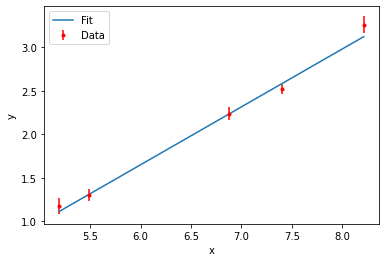

In [6]:
# Create a graph showing the data.
plt.errorbar(xdata,ydata,yerr=d_y,fmt='r.',label='Data')

# Compute a best fit line from the fit intercept and slope.
yfit = inter + slope*xdata

# Create a graph of the fit to the data. We just use the ordinary plot
# command for this.
plt.plot(xdata,yfit,label='Fit')

# Display a legend, label the x and y axes and title the graph.
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Save the figure to a file
plt.savefig('FakeDataPlot_with_error_example.png',dpi=300)

# Show the graph in a new window on the users screen.
plt.show()

Now we can display the numerical result.

In [7]:
print(f'The slope = {slope}, with uncertainty {d_slope}')
print(f'The intercept = {inter}, with uncertainty {d_inter}')

The slope = 0.6656554029423388, with uncertainty 0.031509241912144915
The intercept = -2.343290998591035, with uncertainty 0.21252523580105923


When we have estimated uncertainties in the data, then we can estimate the goodness of fit by computing the reduced chi-squared statistic. For a linear fit to a set of $N$ data points $\{x_i,y_i\}$ that have esimated uncertainties in the $y_i$ values of $\{\delta y_i\}$,  
$$
\chi_r^2 = \frac{1}{N-2}\sum_{i=1}^N \frac{\left(y_i-y(x_i)\right)^2}{\delta y_i},
$$
where for a linear fit $y(x) = a + bx$.  For a good fit, $\chi_r^2$ should be approximatly equal to one.

In [8]:
chisqr = sum((ydata-linearFunc(xdata,inter,slope))**2/d_y**2)
dof = len(ydata) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {chisqr_red}')

Reduced chi^2 = 1.264252030008811


In this case, the computed value of $\chi_r^2$ is close to one indicating a good fit. See the [Scientific Computing Toobox: Data Fitting](https://faculty1.coloradocollege.edu/~sburns/toolbox/DataFitting.html) page or the [references listed at the end of this page](#references) for a more complete discussion of the reduced chi-square statistic. 

## Summary

The code above is all you should need to do linear fits to data. When you're confronted with a new data analysis problem that requires a fit, it is usually faster to modify existing code than to reinvent it every time. I've included the Python script `linearfit_with_error.py` in the `code`.  Feel free to modify the program and use it when you need to fit data to a function.

A table with a short description of the Python functions used in this tutorial is posted on the [Scientific Computing Toolbox: Command Summary Page](https://faculty1.coloradocollege.edu/%7Esburns/toolbox/CommandSummary.html). 


<hr>
<a name="references"><b>References</b></a>

1. Bevington and Robinson, *Data Reduction and Error Analysis for the Physical Sciences 3rd Edition* (McGraw-Hill Education, 2002)  
2. Taylor, *An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements 2nd Edition*, (University Science Books, 1996)